In [1]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools

In [2]:
num_samples=10
num_features=2
samples = np.array(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))

In [3]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    result = []
    
    for (i, j) in itertools.product(range(len(xx)), range(len(xx[0]))):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
#     Z = np.c_[xx.ravel(), yy.ravel()]
#     Z = clf.predict(Z)
#     Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plt_all(predictor, X, y):
    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    C = 1.0  # SVM regularization parameter

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    plot_contours(plt, predictor, xx, yy,
                  cmap=plt.cm.coolwarm, 
                  alpha=0.8)
    plt.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.show()

In [4]:
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

trainer = svm.SVMTrainer(svm.Kernel.gaussian(0.8))
# trainer = svm.SVMTrainer(svm.Kernel.linear())
predictor = trainer.train(samples, labels)

[[ -6.91308959e-01   1.75396496e+00]
 [ -1.55340521e-03  -3.91814302e-01]
 [  4.31000420e-03  -3.80928040e-01]
 [  7.69215305e-01   1.32384494e-01]
 [ -8.53746050e-01  -1.06084976e+00]
 [  3.27763484e-01  -1.13881280e+00]
 [  5.23865826e-01  -1.38791168e+00]
 [ -1.23361560e-01  -1.06177829e+00]
 [ -1.63739412e-02   1.18864279e+00]
 [  1.02577165e+00  -1.81682308e-01]]
     pcost       dcost       gap    pres   dres
 0: -2.3303e+00 -6.1228e+00  4e+00  2e-16  2e+00
 1: -2.6820e+00 -2.9546e+00  3e-01  3e-16  2e-01
 2: -2.8826e+00 -2.9514e+00  7e-02  4e-16  2e-02
 3: -2.8867e+00 -2.8875e+00  8e-04  3e-16  2e-04
 4: -2.8868e+00 -2.8868e+00  8e-06  2e-16  2e-06
 5: -2.8868e+00 -2.8868e+00  8e-08  3e-16  2e-08
Optimal solution found.


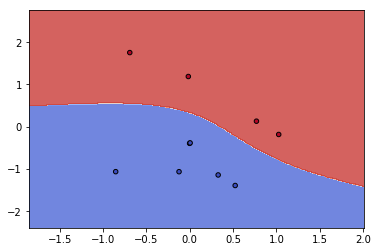

In [5]:
plt_all(predictor, samples, labels)

[[ -6.91308959e-01   1.75396496e+00]
 [ -1.55340521e-03  -3.91814302e-01]
 [  4.31000420e-03  -3.80928040e-01]
 [  7.69215305e-01   1.32384494e-01]
 [ -8.53746050e-01  -1.06084976e+00]
 [  3.27763484e-01  -1.13881280e+00]
 [  5.23865826e-01  -1.38791168e+00]
 [ -1.23361560e-01  -1.06177829e+00]
 [ -1.63739412e-02   1.18864279e+00]
 [  1.02577165e+00  -1.81682308e-01]]
     pcost       dcost       gap    pres   dres
 0: -2.1822e+00 -4.8296e+00  2e+01  4e+00  2e+00
 1: -1.9153e+00 -4.4971e+00  4e+00  3e-01  1e-01
 2: -2.2983e+00 -2.5851e+00  3e-01  2e-03  8e-04
 3: -2.4594e+00 -2.4973e+00  4e-02  2e-04  7e-05
 4: -2.4889e+00 -2.4894e+00  5e-04  2e-06  9e-07
 5: -2.4892e+00 -2.4893e+00  5e-06  2e-08  9e-09
 6: -2.4893e+00 -2.4893e+00  5e-08  2e-10  9e-11
Optimal solution found.


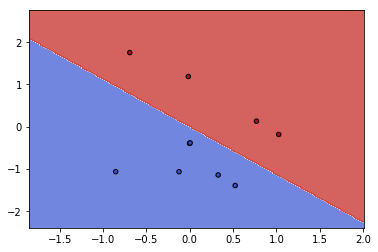

In [6]:
labels = 2 * (samples.sum(axis=1) > 0) - 1.0

# trainer = svm.SVMTrainer(svm.Kernel.gaussian(0.5))
trainer = svm.SVMTrainer(svm.Kernel.linear())
predictor = trainer.train(samples, labels)

plt_all(predictor, samples, labels)